In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\q1036075\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [7]:
data.shape

(506, 14)

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [11]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [13]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

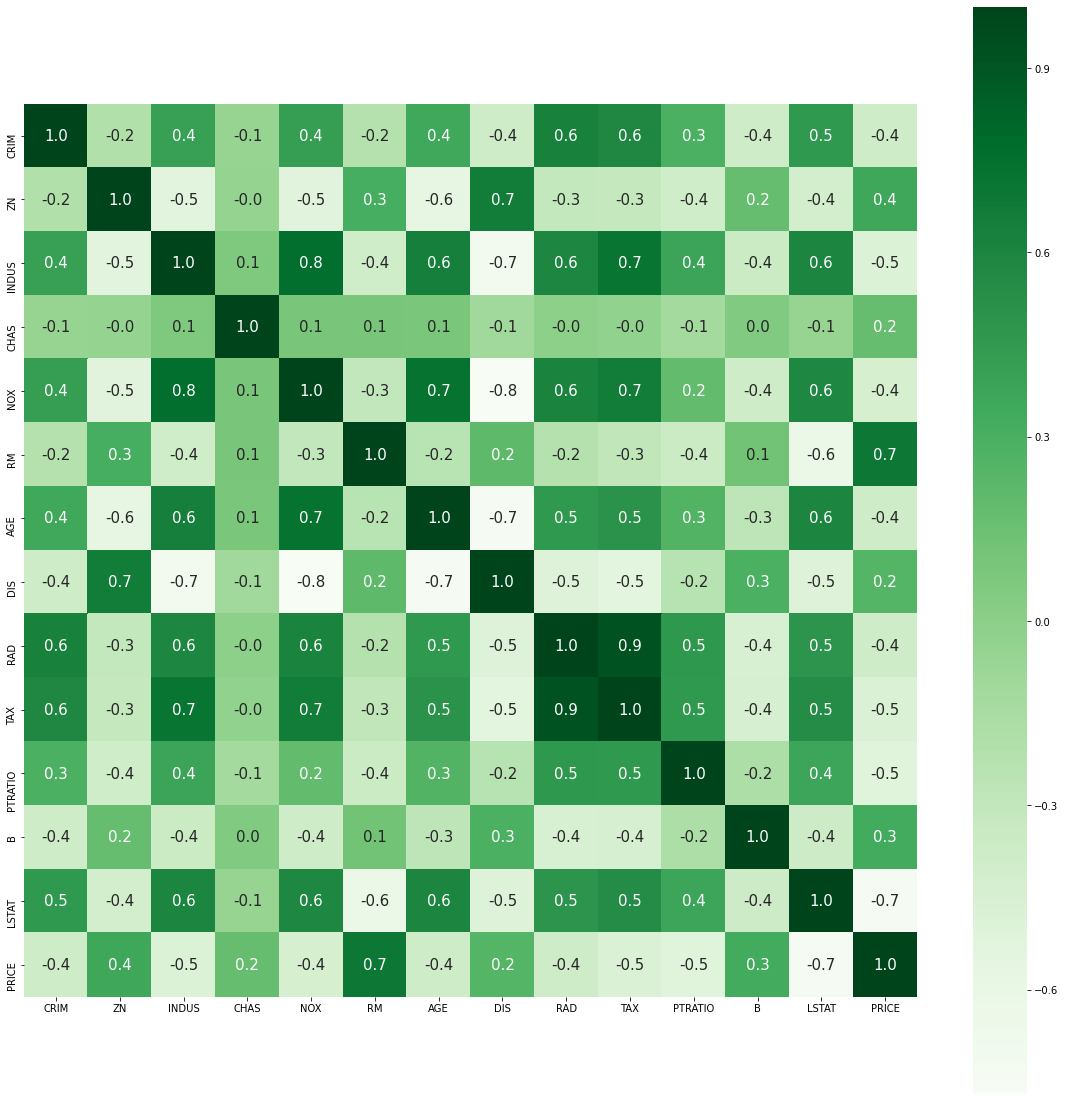

In [15]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [16]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [17]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

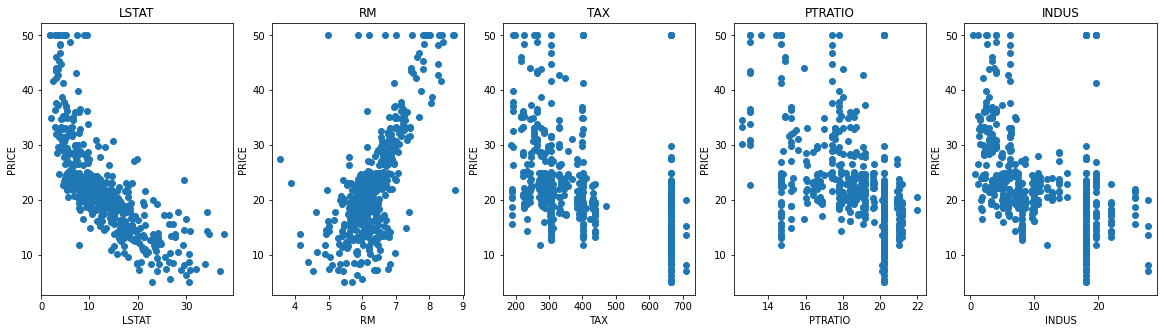

In [18]:
#Scatter plot of any 5 variables...took the ones with highest correlation with PRICE

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'TAX', 'PTRATIO','INDUS']
target = data['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

In [19]:
import statsmodels.api as sm
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
data["constant"]=1

In [39]:
X = data.loc[:,["constant","LSTAT"]]
y = data.PRICE

In [40]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)

In [41]:
statsModel = sm.OLS(y_train_1, X_train_1)

In [42]:
fittedModel = statsModel.fit()
print(fittedModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     495.9
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           3.76e-72
Time:                        21:27:29   Log-Likelihood:                -1310.5
No. Observations:                 404   AIC:                             2625.
Df Residuals:                     402   BIC:                             2633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      34.8729      0.630     55.341      0.0

In [43]:
y_train_predict_1 = fittedModel.predict(X_train_1)

In [44]:
rmse = sqrt(mean_squared_error(y_train_1, y_train_predict_1))
r2 = r2_score(y_train_1, y_train_predict_1)

print("The model performance for training set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

The model performance for training set:
RMSE 6.201452973865344
R2 score 0.552301990803739


In [45]:
y_test_predict_1 = fittedModel.predict(X_test_1)

In [46]:
rmse = sqrt(mean_squared_error(y_test_1, y_test_predict_1))
r2 = r2_score(y_test_1, y_test_predict_1)

print("The model performance for testing set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

The model performance for testing set:
RMSE 6.230716573098681
R2 score 0.5041523728903134


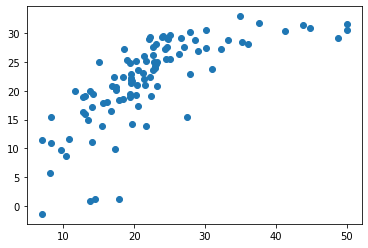

In [48]:
#Actual vs Prediction Values for LSTAT.
#Ideally should be straight line but adding ridge/lasso hyperparameter can reduce rmse value.
plt.scatter(y_test_1, y_test_predict_1)
plt.show()

In [49]:
#second variable - RM
X = data.loc[:,["constant","RM"]]
y = data.PRICE

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)
statsModel = sm.OLS(y_train_1, X_train_1)
fittedModel = statsModel.fit()

y_train_predict_1 = fittedModel.predict(X_train_1)
rmse = sqrt(mean_squared_error(y_train_1, y_train_predict_1))
r2 = r2_score(y_train_1, y_train_predict_1)
print("The model performance for training set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

y_test_predict_1 = fittedModel.predict(X_test_1)
rmse = sqrt(mean_squared_error(y_test_1, y_test_predict_1))
r2 = r2_score(y_test_1, y_test_predict_1)

print("The model performance for testing set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

The model performance for training set:
RMSE 6.972277149440586
R2 score 0.43408977906372137
The model performance for testing set:
RMSE 4.895963186952219
R2 score 0.6938399401553493


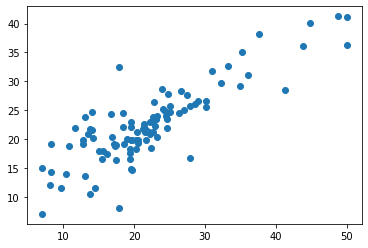

In [50]:
#Actual vs Prediction Values for LSTAT.
#Ideally should be straight line but adding ridge/lasso hyperparameter can reduce rmse value.
plt.scatter(y_test_1, y_test_predict_1)
plt.show()

In [51]:
#Third variable - TAX
X = data.loc[:,["constant","TAX"]]
y = data.PRICE

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)
statsModel = sm.OLS(y_train_1, X_train_1)
fittedModel = statsModel.fit()


y_train_predict_1 = fittedModel.predict(X_train_1)
rmse = sqrt(mean_squared_error(y_train_1, y_train_predict_1))
r2 = r2_score(y_train_1, y_train_predict_1)

print("The model performance for training set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))


y_test_predict_1 = fittedModel.predict(X_test_1)
rmse = sqrt(mean_squared_error(y_test_1, y_test_predict_1))
r2 = r2_score(y_test_1, y_test_predict_1)

print("The model performance for testing set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

The model performance for training set:
RMSE 8.282035144672555
R2 score 0.20150464914201238
The model performance for testing set:
RMSE 7.434778339809661
R2 score 0.29399415462738965


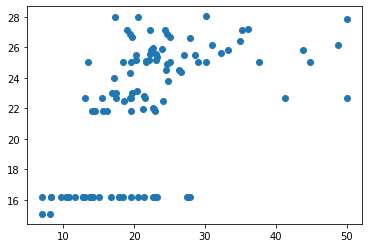

In [52]:
#Actual vs Prediction Values for LSTAT.
#Ideally should be straight line but adding ridge/lasso hyperparameter can reduce rmse value.
plt.scatter(y_test_1, y_test_predict_1)
plt.show()

In [53]:
#fourth variable - PTRATIO
X = data.loc[:,["constant","PTRATIO"]]
y = data.PRICE

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)
statsModel = sm.OLS(y_train_1, X_train_1)
fittedModel = statsModel.fit()


y_train_predict_1 = fittedModel.predict(X_train_1)
rmse = sqrt(mean_squared_error(y_train_1, y_train_predict_1))
r2 = r2_score(y_train_1, y_train_predict_1)

print("The model performance for training set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

y_test_predict_1 = fittedModel.predict(X_test_1)
rmse = sqrt(mean_squared_error(y_test_1, y_test_predict_1))
r2 = r2_score(y_test_1, y_test_predict_1)

print("The model performance for testing set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

The model performance for training set:
RMSE 7.971114169892685
R2 score 0.26033288154359335
The model performance for testing set:
RMSE 7.691076135702575
R2 score 0.2444791258361806


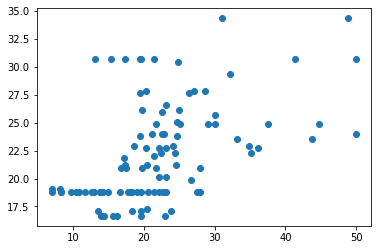

In [54]:
#Actual vs Prediction Values for LSTAT.
#Ideally should be straight line but adding ridge/lasso hyperparameter can reduce rmse value.
plt.scatter(y_test_1, y_test_predict_1)
plt.show()

In [55]:
#fifth variable - INDUS
X = data.loc[:,["constant","INDUS"]]
y = data.PRICE

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)
statsModel = sm.OLS(y_train_1, X_train_1)
fittedModel = statsModel.fit()


y_train_predict_1 = fittedModel.predict(X_train_1)
rmse = sqrt(mean_squared_error(y_train_1, y_train_predict_1))
r2 = r2_score(y_train_1, y_train_predict_1)

print("The model performance for training set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))


y_test_predict_1 = fittedModel.predict(X_test_1)
rmse = sqrt(mean_squared_error(y_test_1, y_test_predict_1))
r2 = r2_score(y_test_1, y_test_predict_1)
print("The model performance for testing set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))


The model performance for training set:
RMSE 8.152894360994136
R2 score 0.22621218969347145
The model performance for testing set:
RMSE 7.587012708764931
R2 score 0.2647858281172605


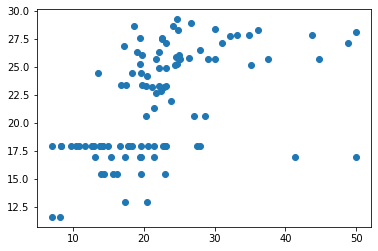

In [56]:
#Actual vs Prediction Values for LSTAT.
#Ideally should be straight line but adding ridge/lasso hyperparameter can reduce rmse value.
plt.scatter(y_test_1, y_test_predict_1)
plt.show()

In [57]:
# R2 value is high for LSTAT and RM as compared to other selected variables
# RMSE is low for LSTAT and RM as compared to other selected variables
#Hence, LSTAT and RM has better correlation with the price and fit the model well and also the predicted values our more closer to actual values

In [58]:
#Multiple linear regression
X = data.loc[:,["constant",'LSTAT', 'RM', 'TAX', 'PTRATIO','INDUS']]
y = data.PRICE

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=5)
statsModel = sm.OLS(y_train_1, X_train_1)
fittedModel = statsModel.fit()


y_train_predict_1 = fittedModel.predict(X_train_1)
rmse = sqrt(mean_squared_error(y_train_1, y_train_predict_1))
r2 = r2_score(y_train_1, y_train_predict_1)

print("The model performance for training set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))


y_test_predict_1 = fittedModel.predict(X_test_1)
rmse = sqrt(mean_squared_error(y_test_1, y_test_predict_1))
r2 = r2_score(y_train_1, y_train_predict_1)
print("The model performance for testing set:")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))

The model performance for training set:
RMSE 5.29830406899895
R2 score 0.6732075523202916
The model performance for testing set:
RMSE 4.883605981271861
R2 score 0.6732075523202916


In [59]:
#R2 value has increased as comapred to the models with individual paramters
#~70% of the observed variation can be explained by the model's inputs
#There is considerable difference in the observed and predicted values
#RMSE value should be less and compared for taking Individual Values it is more ;so multiple Linear Regression works well.

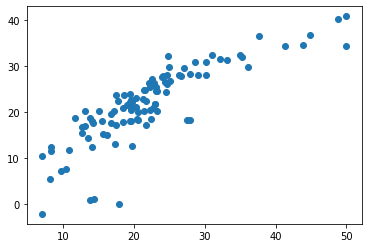

In [60]:
#Actual vs Prediction Values for 5 features when taken into account.
#Ideally should be straight line but adding ridge/lasso hyperparameter can reduce rmse value.
plt.scatter(y_test_1, y_test_predict_1)
plt.show()

In [61]:
#Model Fit works best by taking Multiple Features for Linear Regression.